In [1]:
import os

import pandas as pd
import requests
from bs4 import BeautifulSoup
from dotenv import load_dotenv
from geopy.geocoders import GoogleV3, Nominatim
import folium
import geojson
import numpy as np
from shapely.geometry import shape, Point
from IPython.display import Image
import matplotlib.cm as cm
import matplotlib.colors as colors

# Combine all data on one map:
- 5 clusters with most popular venues
- average flat price per neighborhood

In [2]:
minsk_areas = r'datas/minsk_areas.geojson'
flat_norm = pd.read_csv('datas/flat_norm.csv')
minsk_cluster = pd.read_csv('datas/minsk_cluster.csv')

In [9]:
minsk_cluster['cluster-label'].value_counts()

2    95
0    16
4     8
3     1
1     1
Name: cluster-label, dtype: int64

In [3]:
address = 'Minsk, BY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Minsk are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Minsk are 53.902334, 27.5618791.


In [4]:
map_minsk_flat = folium.Map(location=[latitude, longitude], zoom_start=12)

In [5]:
choropleth = folium.Choropleth(
    geo_data=minsk_areas,    # geojson
    data=flat_norm,
    columns=['area', 'avg-price'],
    key_on='feature.properties.neighborhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Flat Price',
).add_to(map_minsk_flat)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['neighborhood'])
)

In [6]:
colors_array = ['blue', 'purple', 'grey', 'red', 'green']
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(minsk_cluster['lat'], minsk_cluster['lng'], 
                                  minsk_cluster['zip-code'], minsk_cluster['cluster-label']):
    label_text = str(poi) + ' Cluster ' + str(cluster)
    label = folium.Popup(label_text, parse_html=True)
    folium.CircleMarker(
        (lat, lon),
        radius=5,
        popup=label,
        tooltip=label_text,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_minsk_flat)

In [7]:
map_minsk_flat

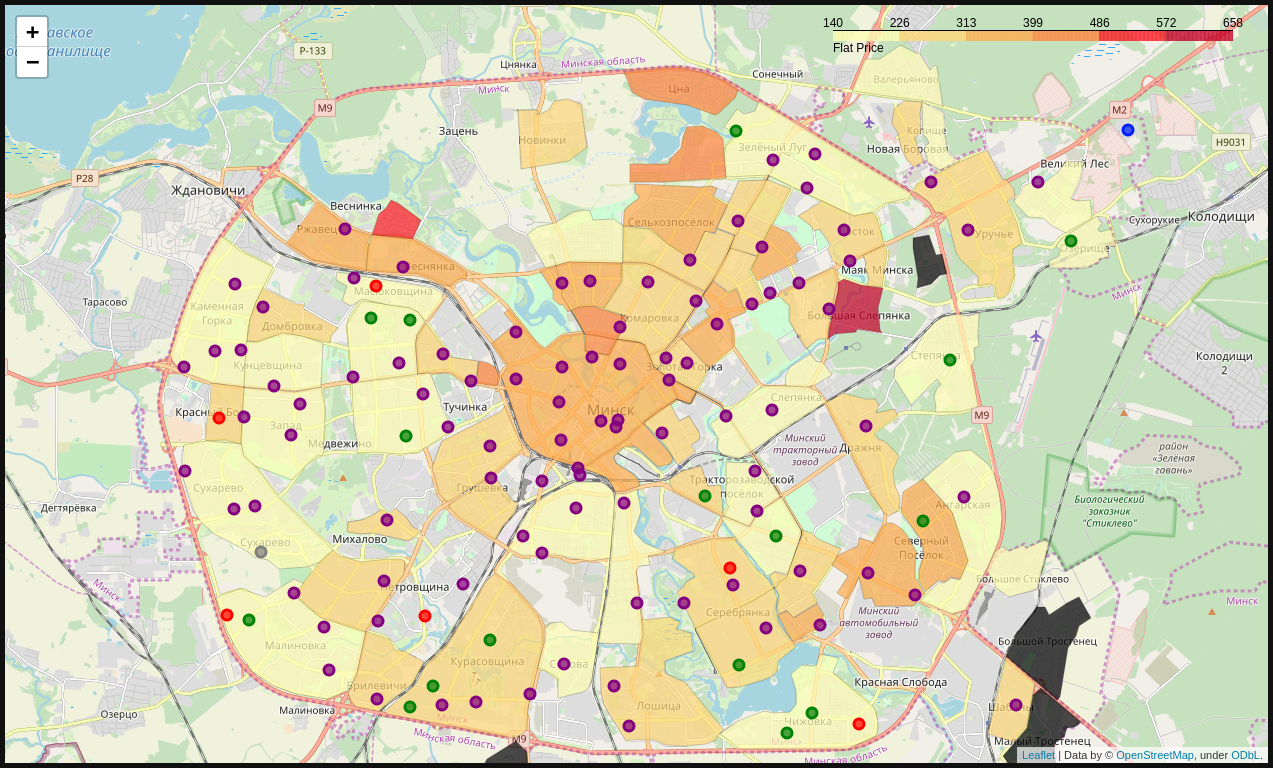

In [8]:
Image('imgs/final_result.png')

# Thank you all for attention!